<a href="https://colab.research.google.com/github/CHANDANAHEGADE/Statistical-analysis/blob/main/Statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM   STATEMENT
Explanation: The dataset shows the results of an experiment that has 3 components – a set of classifiers,  features sets and blocks of time. Various combinations of these 3 factors give different ranking of F1 and MCC scores.
The dataset contains: 
●	A total of nine classifiers (C) - C1 to C9.
●	Five time segments (T) i.e., 2 min, 5 min, 10 min, 15 min and 30 min.
●	Three feature set (S) - A, B, C 
●	Scores : F1, Recall, Precision & MCC

In [ ]:
# Here we are importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading the dataset from csv file and showing sample data
data=pd.read_csv('Scores Dataset.csv')
data.head(10)

,C,T,S,F1,Recall,Precision,MCC
0,C1,2min,A,0.886354,0.919236,0.871495,0.919236
1,C2,2min,A,0.883949,0.911894,0.886433,0.911894
2,C3,2min,A,0.971346,0.970631,0.973364,0.970631
3,C4,2min,A,0.781009,0.726872,0.858229,0.726872
4,C5,2min,A,0.901466,0.922173,0.913166,0.922173
5,C6,2min,A,0.984601,0.985316,0.985549,0.985316
6,C7,2min,A,0.875758,0.908957,0.876829,0.908957
7,C8,2min,A,0.987578,0.988253,0.988402,0.988253
8,C9,2min,A,0.977391,0.977974,0.977442,0.977974
9,C1,5min,A,0.824859,0.876652,0.795108,0.876652


In [ ]:
# Here we are getting the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 7 columns):
C            135 non-null object
T            135 non-null object
S            135 non-null object
F1           135 non-null float64
Recall       135 non-null float64
Precision    135 non-null float64
MCC          135 non-null float64
dtypes: float64(4), object(3)
memory usage: 5.8+ KB


1.	Identify the best combinations of the 3 factors on the basis of the scores

To solve this question we take the mean of F1, Recall and Precision. And we select best combination corresponding to the highest mean. 

In [ ]:
#Here we keep required columns and drop the remaining.Since Recall and MCC are same we drop MCC
X=data.drop(['C','T','S','MCC'], axis=1)
X=pd.DataFrame(X)
# Calculating the mean
Mean=X.mean(axis=1)
# Finding the maximum mean value
maxi=Mean.max()
# Finding position of the maximum mean value
pos=Mean.idxmax()
print("Maximum mean is", maxi, "in the position", pos)

Maximum mean is 0.9880777813333333 in the position 7


Since we get maximum mean as 0.9880777813333333 in the position 7,
we can say that best combination of three factors is C(C8), T(2min), S(A)

2.	Rank the best combination of C, T & S based on F1 and MCC

We rank the best combinations based on highest mean to the lowest.

In [ ]:
# We used sort function to rank the best combinations
data.sort_values("Mean", ascending=False)

,C,T,S,F1,Recall,Precision,MCC,Mean
7,C8,2min,A,0.987578,0.988253,0.988402,0.988253,0.988078
52,C8,2min,B,0.987578,0.988253,0.988402,0.988253,0.988078
95,C6,2min,C,0.984820,0.985790,0.986002,0.985790,0.985538
97,C8,2min,C,0.984820,0.985790,0.986002,0.985790,0.985538
50,C6,2min,B,0.984601,0.985316,0.985549,0.985316,0.985155
5,C6,2min,A,0.984601,0.985316,0.985549,0.985316,0.985155
98,C9,2min,C,0.982220,0.983126,0.982599,0.983126,0.982649
47,C3,2min,B,0.979803,0.979442,0.980646,0.979442,0.979964
61,C8,5min,B,0.978704,0.979442,0.979953,0.979442,0.979366
8,C9,2min,A,0.977391,0.977974,0.977442,0.977974,0.977602


3.	Show statistical significance in your results using various methods.

To solve this question first we use OLS method to fit Mean(Dependent variable) against C, T, S(Independent variables) to get residuals. Then we calculate ANOVA table test the hypothesis
H0: All the combinations gives the same score
H1: At least one combination gives different score
In ANOVA table calculated F-test is greater than F-critical value we reject H0.

In [ ]:
 import scipy as sp
sns.distplot(data['Mean'], fit=sp.stats.norm, kde=False)
plt.show()

NameError: ignored

In [ ]:
# Fitting OLS model
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
Data=data.drop(['MCC'], axis=1)
model=ols("Mean~C+T+S", Data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     53.14
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.37e-44
Time:                        11:01:17   Log-Likelihood:                 205.44
No. Observations:                 135   AIC:                            -380.9
Df Residuals:                     120   BIC:                            -337.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7122      0.019     38.131      0.0

             df    sum_sq   mean_sq          F        PR(>F)
C           8.0  1.921582  0.240198  76.505221  1.772408e-43
T           4.0  0.363592  0.090898  28.951844  7.607740e-17
S           2.0  0.050684  0.025342   8.071648  5.141610e-04
Residual  120.0  0.376755  0.003140        NaN           NaN


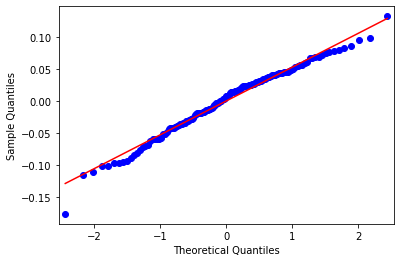

In [ ]:
# ANOVA table
anova=anova_lm(model)
print(anova)
 
#Check the Normality of the residuals
residuals=model.resid
figg=sm.qqplot(residuals, line='s')
plt.show()

From the QQ-plot we can see that residuals are almost normally distributed, so normality assumption of ANOVA satisfies.

Since F-calculated values are greater than F-critical values we reject H0 and conclude that at least one combination gives different score.
To identify which combinations are giveing different scores, we use Tuckey HSD mothod.

In [ ]:
# Tuckey HSD mothod
from bioinfokit.analys import stat
res=stat()
res.tukey_hsd(data, res_var='Mean', xfac_var=['C', 'T', 'S'], anova_model='Mean~C+T+S')
res.tukey_summary.sort_values("p-value", ascending=True)

,group1,group2,Diff,Lower,Upper,q-value,p-value
4017,"(C3, 5min, B)","(C4, 30min, A)",0.555647,0.192940,0.918355,9.916546,0.001
4215,"(C3, 10min, A)","(C4, 30min, B)",0.485424,0.122717,0.848131,8.663279,0.001
6182,"(C4, 30min, B)","(C9, 2min, C)",0.509215,0.146508,0.871922,9.087877,0.001
6183,"(C4, 30min, B)","(C9, 5min, A)",0.472138,0.109431,0.834845,8.426161,0.001
6184,"(C4, 30min, B)","(C9, 5min, B)",0.497099,0.134392,0.859806,8.871647,0.001
6185,"(C4, 30min, B)","(C9, 5min, C)",0.497760,0.135053,0.860467,8.883440,0.001
6187,"(C4, 30min, B)","(C9, 10min, B)",0.471027,0.108319,0.833734,8.406332,0.001
4214,"(C3, 10min, A)","(C4, 30min, A)",0.541057,0.178350,0.903764,9.656151,0.001
6188,"(C4, 30min, B)","(C9, 10min, C)",0.481725,0.119018,0.844432,8.597265,0.001
6191,"(C4, 30min, B)","(C9, 15min, C)",0.481957,0.119250,0.844664,8.601402,0.001


From the above Tuckey HSD test result consider P-values.
The combinations having P-value lesser than alpha level of significance (generally we consider alpha value=0.05) are not having statistically significant different scores. And the combinations having P-value greater than alpha level of significance (generally we consider alpha value=0.05) are having statistically significant different scores. 